# Reconocimiento de patrones y aprendizaje automatico
## Tarea 1: Regresión Lineal

#### Profesor: Andrés Aldana Gonzáles<br> Ayudante: Felipe Navarrete Córdova<br> Alumno: Ricardo Eduardo Rivas Roa
Sábado 13 de noviembre de 2021

## 1. Ejercicios
### 1. Contesta las siguientes preguntas (1 pt).
$a)$ ¿Qué tipo de problemas se pueden resolver mediante regresión?<br>
<br>$R$. Únicamente problemas donde las variables independientes puedan explicar a la variable dependiente por medio de un modelo lineal, es decir, que las variables independientes tengan una correlación lineal con la variable dependiente. Es preferible que no exista correlación lineal entre las variables independientes para evitar que exista ruido en el modelo. Por lo tanto, este método consiste en ajustarle un hiperplano a las variables y usar el hiperplano para predecir futuros datos.
<br>
<br>$b)$ ¿La siguiente ecuación es un modelo de regresión lineal? 
<br> $$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_1^2$$
<br> $R.$ Sí, según Christopher M. Bishop (2011) podemos extender la clase de modelos al considerar combinaciones lineales de funciones no lineales en las entradas de las variables, es decir  $y(x, w) = w_0 + \sum^{M−1}_{j=1} w_j\Phi_j (x)$ donde $\Phi_j(x)$ se concen como las funciones base. Ahora, denotando el valor máximo del index $j$ por $M-1$, tenemos que el número total de parametros en este modelo será de M. Particularmente, en la ecuación de esta pregunta tenemos $M=2$ donde $\Phi_j=x^j$.


$c)$ En regresión lineal, ¿Cómo se define e interpreta el coeficiente $R^2$? <br>
<br>$R.$ Se define como $R^2=\frac{Var(y)-E}{Var(y)}$ con dominio en los reales de $[0,1]$, donde $Var(y)=\frac{1}{n}\sum_{i=1}^{n}(y_i - \mu)^2$ y $E$ es  $E=\frac{1}{n}\sum_{i=1}^n (y_i - (a+bx_i))^2$. Este coeficiente nos dice qué tanta de la variación en la variable dependiente se puede explicar por medio de las variables independientes, de modo que, $R^2=0$ nos dice que nada de la variación en la variable dependiente se explica por las variables independientes y $R^2=1$ nos dice que toda la variación de la variable dependiente se puede explicar por las variables independientes.

<br>$d)$ ¿Es conveniente utilizar el valor $R^2$ en regresión no lineal? En caso contrario, ¿qué métrica o valor se puede utilizar?<br>

<br>$R.$ Sí es conveniente debido a que existen muchas variaciones de $R^2$ para muchos modelos de regresión. La idea es encontar la forma particular para el modelo de regresión que se está usando.

<br>$e)$ ¿Qué es el sobre entrenamiento en una regresión?<br>

<br>$R.$ Es cuando los datos de entrenamiento ajustan bien a la regresión lineal, pero al compararlos con los datos de prueba estos se ajustan de forma pésima. Para resolver este problema se puede aplicar algún tipo de regularización, ya sea L2 o L1.

<br>$f)$ Supongamos que los resultados de una regresión muestran que el coeficiente de regresión es $R^2 = 1$. ¿Podría este modelo estar sobre entrenado? Justifica tu respuesta.<br>

<br>$R.$ Es muy probable que el modelo esté sobre entrenado ya que es muy difícil encontrar datos que hagan un ajuste perfecto en una regresión lineal. Para saber si hay un sobre entrenamiento se puede hacer una comparación de el ajuste con los datos de prueba o, si la muestra es muy pequeña, no queda otra opción mas que procurar conseguir más datos. Otra explicación al coeficiente tan alto es que se tenga un caso de data leakage, que es cuando se usan datos en el proceso de entrenamiento del modelo que no se esperaría que estuvieran disponibles en el momento de la predicción.

### 2. Peso y Altura (5 pts).
El archivo weight-height .csv contiene los datos de peso (libras) y estatura (pulgadas) de hombres y mujeres. Realice los siguientes ejercicios:
<br>a) Realice una gráfica de puntos peso (eje y) vs altura (eje x) que muestre la relación entre ambas variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [2]:
#se leen y se visualizan los datos
weight_height=pd.read_csv('weight-height.csv')
weight_height.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
#checando si hay valores nulos
weight_height.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

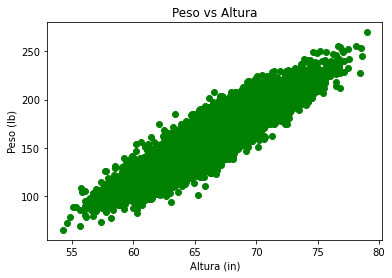

In [4]:
#Se grafica el scatterplot
plt.scatter(weight_height.Height, weight_height.Weight, c='g')
plt.xlabel('Altura (in)')
plt.ylabel('Peso (lb)')
plt.title('Peso vs Altura')
plt.show()

b) Calcule el coeficiente de correlación de Pearson entre peso y altura.

In [5]:
#Se calcula el coeficiente de Pearson
altura_peso=weight_height[['Height','Weight']]
altura_peso.corr()

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


c) Realice y grafique una regresión lineal para calcular el peso de una persona en función de su altura. Proporcione los coeficientes de la regresión.

In [6]:
#se cambian los datos de altura a un array (-1,1) para poder meter los datos al modelo y hacer la predicción
altura = weight_height.Height.values.reshape(-1, 1)
#Se ajusta el modelo y se hacen las predicciones
mod_reg = LinearRegression().fit(altura, weight_height.Weight.values)
pred = mod_reg.predict(altura)

In [7]:
#Se imprimen valores del modelo
print("Coeficientes =", mod_reg.coef_)
print("Intercept =", mod_reg.intercept_)

Coeficientes = [7.71728764]
Intercept = -350.7371918154157


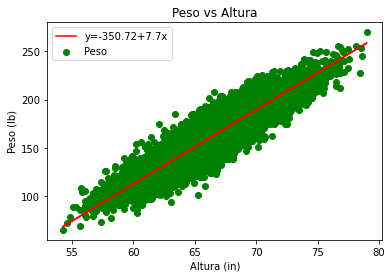

In [8]:
#Se grafican el ajuste y el scatterplot
plt.scatter(weight_height.Height, weight_height.Weight, c='g')
plt.plot(weight_height['Height'], pred, 'r')
plt.xlabel('Altura (in)')
plt.ylabel('Peso (lb)')
plt.legend(['y=-350.72+7.7x','Peso'])
plt.title('Peso vs Altura')
plt.show()

d) Calcule e interprete el coeficiente de determinación R2.

In [9]:
print("R^2 =", mod_reg.score(altura, weight_height.Weight))

R^2 = 0.8551742120552469


Esto nos indica que se disminuyó el 85% de la variación del peso tomando en consideración la altura.

e) Grafique un histograma de los valores residuales de la regresión.

In [10]:
#Se calcula los residuales como (peso - predicción)
series_pred=pd.Series(pred)
Peso=weight_height.Weight
residuales=Peso - series_pred

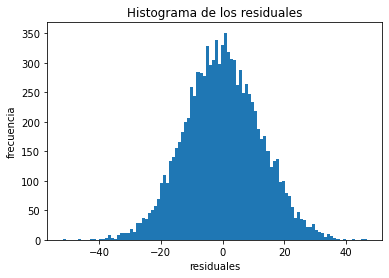

Media del histograma: -3.6415315207705135e-14
Desviación estándar: 12.219182247651997


In [11]:
#se hace el histograma
plt.hist(residuales, 100)
plt.xlabel('residuales')
plt.ylabel('frecuencia')
plt.title('Histograma de los residuales')
plt.show()
print('Media del histograma:',residuales.mean())
print('Desviación estándar:',residuales.std())

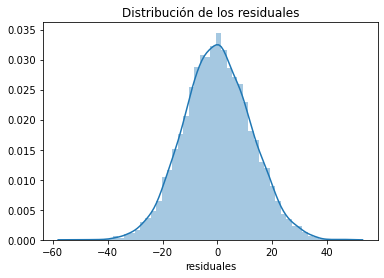

In [12]:
#Se grafica la distribución
sns.distplot(a=residuales)
plt.xlabel('residuales')
plt.title('Distribución de los residuales')
plt.show()

f) ¿Cuál es el error esperado al hacer una predicción con este modelo?

In [13]:
print('Error absoluto medio (MAE):', mean_absolute_error(Peso, series_pred))
print("Error cuadrático medio (MSE): %.2f" % mean_squared_error(Peso, series_pred))

Error absoluto medio (MAE): 9.7467187653962
Error cuadrático medio (MSE): 149.29


g) Calcule y grafique un intervalo de confianza de la regresión con un valor de confianza de 90 %.

In [14]:
#se tomaran 2 desviaciones estándar arriba  y abajo de la regresión para ajustar el 95% de los datos 
#en los intervalos de confianza
upper_bound=pd.Series(pred)+(2*residuales.std())
lower_bound=pd.Series(pred)-(2*residuales.std())

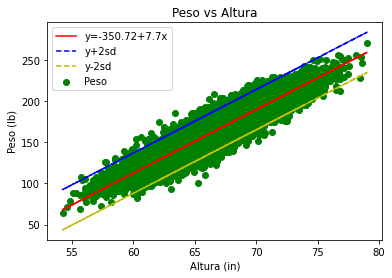

Desviación estándar: 12.219182247651997


In [15]:
#Se grafican los intervalos de confianza
plt.scatter(weight_height.Height, weight_height.Weight, c='g')
plt.plot(weight_height['Height'], pred, 'r')
plt.plot(weight_height['Height'], upper_bound, 'b',ls='--')
plt.plot(weight_height['Height'], lower_bound, 'y', ls='--')
plt.xlabel('Altura (in)')
plt.ylabel('Peso (lb)')
plt.legend(['y=-350.72+7.7x', 'y+2sd','y-2sd','Peso'])
plt.title('Peso vs Altura')
plt.show()
print('Desviación estándar:',residuales.std())

h) Dada una predicción del peso en función de la altura con este modelo, ¿cuál es la probabilidad de que el error entre el valor observado y la predicción sea menor a 20 libras? Justifique su respuesta.

In [16]:
def proba(row):
    if row<-20:
        row=True
    else:
        row=False
    return row
print('P(x<-20)=',residuales.apply(proba).sum()/len(residuales))

P(x<-20)= 0.0473


Para calcular la probablidad cumulativa del histograma basta con sumar las frecuencias de los residuales menores que -20 y dividirlo entre el total de datos. Es decir $P(x)=\frac{Casos Favorables}{Casos Totales}$.

### 3. Regresión no lineal (5 pts). 
El archivo data.csv contiene dos columnas, una con la variable independiente X y la otra con la variable dependiente Y. Realice los siguientes ejercicios:<br>
a) Realice una gráfica de puntos Y vs X que muestre la relación entre ambas variables.

In [17]:
#Se leen los datos
data=pd.read_csv('data.csv')
data

,X,Y
0,-6.7,-1007.363995
1,-6.2,-574.592531
2,7.3,139.778624
3,4.5,-197.029391
4,2.1,-120.141559
...,...,...
216,-3.0,-412.864423
217,-0.7,511.827560
218,-5.0,-702.786026
219,-3.5,335.183327


In [18]:
#checando si hay valores nulos
data.isnull().sum()

X    0
Y    0
dtype: int64

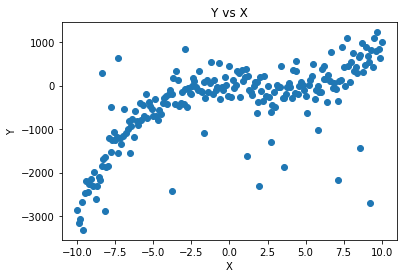

In [19]:
#Se grafica el scatterplot
plt.scatter(data.X, data.Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Y vs X')
plt.show()

b) Implemente una forma para identificar y eliminar outliers en este conjunto de datos.

In [20]:
#Se le hace una regresión lineal simple a los datos
mod_reg = LinearRegression(fit_intercept=True).fit(data.X.values.reshape(-1, 1),data.Y.values)
pred = mod_reg.predict(data.X.values.reshape(-1, 1))

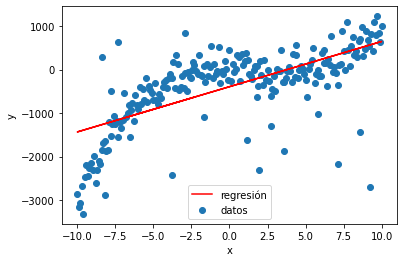

In [21]:
#Se grafica el ajuste y el scatterplot
plt.scatter(data.X, data.Y)
plt.plot(data.X, pred, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['regresión','datos'])

plt.show()

In [22]:
#se calculan residuales respecto a la regresión lineal
residuales=data.Y - pd.Series(pred)

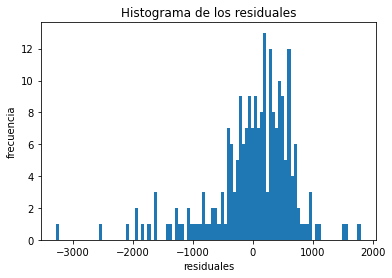

Media del histograma: 1.440376224527262e-14
Desviación estándar: 687.784151908127


In [23]:
#se hace el histograma de residuales
plt.hist(residuales, 100)
plt.xlabel('residuales')
plt.ylabel('frecuencia')
plt.title('Histograma de los residuales')
plt.show()
print('Media del histograma:',residuales.mean())
print('Desviación estándar:',residuales.std())

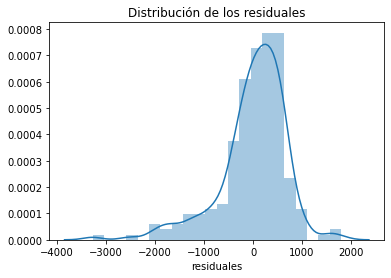

In [24]:
#Se grafica la distribución
sns.distplot(a=residuales)
plt.xlabel('residuales')
plt.title('Distribución de los residuales')
plt.show()

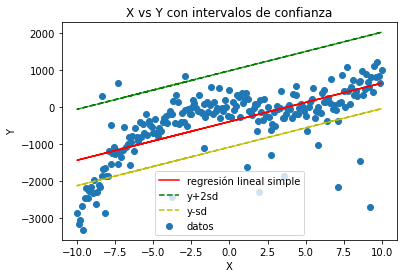

Desviación estándar: 687.784151908127


In [25]:
#Se grafican unos intervalos de confianza
plt.scatter(data.X, data.Y)
plt.plot(data.X, pred, 'r')
plt.plot(data.X, pd.Series(pred)+(2*residuales.std()), 'g',ls='--')
plt.plot(data.X, pd.Series(pred)-(residuales.std()), 'y', ls='--')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['regresión lineal simple', 'y+2sd','y-sd','datos'])
plt.title('X vs Y con intervalos de confianza')
plt.show()
print('Desviación estándar:',residuales.std())

In [26]:
#Función para tirar los outliers del dataframe que quedan fuera del intervalo de confianza
def outliers_out(row):
    if -687.784151908127<row<2*687.784151908127:
        row=True
    else:
        row=False
    return row
data_sin_outliers=data.loc[residuales.apply(outliers_out)]
print('Porcentaje de datos en el df sin outliers respecto al df original:',len(data_sin_outliers)/len(data))

Porcentaje de datos en el df sin outliers respecto al df original: 0.8642533936651584


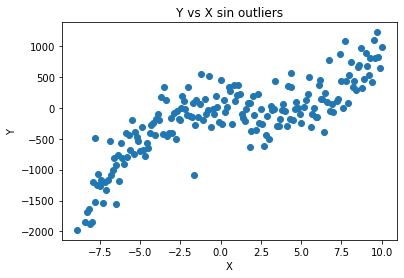

In [27]:
#Se grafica el scatterplot sin outliers
plt.scatter(data_sin_outliers.X, data_sin_outliers.Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Y vs X sin outliers')
plt.show()

c) Proponga y grafique un modelo de regresión que describa la relación entre las variables X y Y · Proporcione los coeficientes de la regresión. Sugerencia: La relación entre X y Y NO ES LINEAL y no es logarítmica.

In [28]:
#Se ajusta un modelo polinomial a los datos
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(data_sin_outliers.X.values.reshape(-1,1))
lin_reg_2=LinearRegression().fit( X_poly, data_sin_outliers.Y.values)
pred = lin_reg_2.predict(X_poly)

In [29]:
#Se imprimen los coeficientes del modelo
print("Coeficientes =", lin_reg_2.coef_)
print("Intercept =", lin_reg_2.intercept_)

Coeficientes = [ 0.          1.44780718 -8.38922039  1.86014987]
Intercept = -18.327750518640357


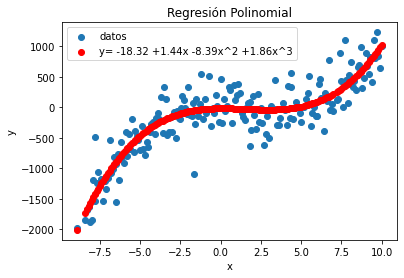

In [30]:
#Se grafica el ajuste y el scatterplot
plt.scatter(data_sin_outliers.X, data_sin_outliers.Y)
plt.scatter(data_sin_outliers.X, pred, c='r')
#plt.scatter(data_sin_outliers.X, data_sin_outliers.X.map(lambda x: -18.32+1.44*x-8.39*x**2+1.86*x**3), c='g')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['datos','y= -18.32 +1.44x -8.39x^2 +1.86x^3'])
plt.title('Regresión Polinomial')
plt.show()

d) Obtén el coeficiente de determinación $R^2$ e interpreta.

In [31]:
print("R^2 =", lin_reg_2.score(X_poly, data_sin_outliers.Y))

R^2 = 0.8010673218574651


Esto nos indica que se disminuyó el 80% de la variación de x tomando en consideración la ecuación cúbica.

e) Grafique el histograma de residuales para este modelo

In [32]:
#se calculan residuales respecto a la regresión polinomial
residuales=data_sin_outliers.Y.reset_index(drop=True) - pd.Series(pred)

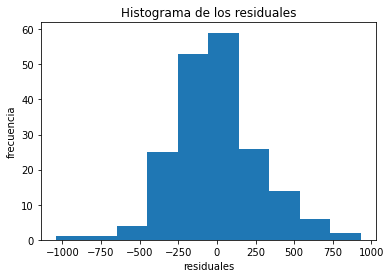

Media del histograma: -1.0103843300127917e-13
Desviación estándar: 272.0970074907208


In [33]:
#se hace el histograma de residuales
plt.hist(residuales)
plt.xlabel('residuales')
plt.ylabel('frecuencia')
plt.title('Histograma de los residuales')
plt.show()
print('Media del histograma:',residuales.mean())
print('Desviación estándar:',residuales.std())

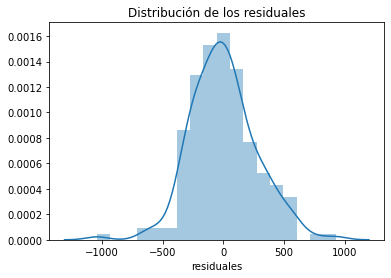

In [34]:
#Se grafica la distribución
sns.distplot(a=residuales)
plt.xlabel('residuales')
plt.title('Distribución de los residuales')
plt.show()

f ) ¿Cuál es el error esperado al hacer una predicción con este modelo de regresión?

In [35]:
print('Error absoluto medio (MAE):', mean_absolute_error(data_sin_outliers.Y, pred))
print("Error cuadrático medio (MSE): %.2f" % mean_squared_error(data_sin_outliers.Y, pred))

Error absoluto medio (MAE): 207.8486357230853
Error cuadrático medio (MSE): 73649.15


g) ¿Cuál es la probabilidad de que una predicción realizada con este modelo tenga un error mayor a 500?

Debido a que no tenemos tantos datos como en el ejercicio pasado tendremos que usar la cumulativa CDF para encontrar la probabilidad, entonces

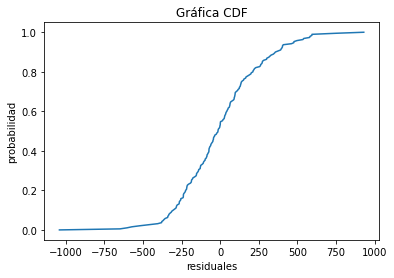

In [36]:
#se ordenan los residuales de menor a mayor y se guardan en la variable x
x = pd.DataFrame(np.sort(residuales),columns=['residual'])
#Se calculan los valores de la CDF y se guardan las probabilidades en la variable y
y = pd.DataFrame(1. * np.arange(len(residuales)) / (len(residuales) - 1),columns=['probabilidad'])
#Gráfica CDF
plt.plot(x, y)
plt.xlabel('residuales')
plt.ylabel('probabilidad')
plt.title('Gráfica CDF')
plt.show()

In [37]:
#Se ven los valores tales que residual>490. 
cdf=pd.concat([x, y], axis=1)
cdf.loc[cdf.residual>490]

,residual,probabilidad
182,497.563447,0.957895
183,535.917525,0.963158
184,541.100278,0.968421
185,579.195549,0.973684
186,581.743893,0.978947
187,593.819994,0.984211
188,594.662697,0.989474
189,747.645762,0.994737
190,929.873001,1.000000


Vemos que CDF(497.56)=0.957895. Y la probabilidad que buscamos es $1-CDF(500)$, de modo que una buena aproxiamación es $1-CDF(500)\approx 1-0.957895=0.042105$.

## Referencias
* Christopher M. Bishop - Pattern Recognition and Machine Learning-Springer (2011) - Chapter 3 - Linear Models for Regression. Retrieved from http://users.isr.ist.utl.pt/~wurmd/Livros/school/Bishop%20-%20Pattern%20Recognition%20And%20Machine%20Learning%20-%20Springer%20%202006.pdf
* StatQuest. (2017). Linear Regression, Clearly Explained!!! [Video]. Retrieved from https://www.youtube.com/watch?v=nk2CQITm_eo&t=270s
* StatQuest. (2018). Regularization Part 2: Lasso (L1) Regression [Video]. Retrieved from https://www.youtube.com/watch?v=NGf0voTMlcs&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF&index=24
* Cook, A. (2021). Data Leakage. Retrieved 7 November 2021, from https://www.kaggle.com/alexisbcook/data-leakage
* VanderPlas, J. (2016). Python Data Science Handbook (1st ed.). Sebastopol, California: O'Reilly. Retrieved 11 November 2021 from https://jakevdp.github.io/PythonDataScienceHandbook/